In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
linear_acceleration16 = pd.read_csv('./aceleracaoLinear_terra.csv')

In [3]:
linear_acceleration16.head()

,timestamp,uptimeNanos,x,y,z
0,14/05/2016 10:54:33,11537640270059,-0.161602,0.120174,-0.209893
1,14/05/2016 10:54:33,11537650128140,-0.122628,0.315638,-0.380996
2,14/05/2016 10:54:33,11537659894659,-0.178777,0.330181,-0.360696
3,14/05/2016 10:54:33,11537679549779,0.016043,0.038759,-0.278204
4,14/05/2016 10:54:33,11537699204899,0.141716,-0.162492,-0.049796


In [8]:
accelerometer16 = pd.read_csv('./acelerometro_terra.csv',parse_dates=True)

In [9]:
accelerometer16.head()

,timestamp,uptimeNanos,x,y,z
0,14/05/2016 10:54:33,11537640270059,-0.161602,0.120174,9.596758
1,14/05/2016 10:54:33,11537650128140,-0.122628,0.315638,9.425655
2,14/05/2016 10:54:33,11537659894659,-0.178777,0.330180,9.445955
3,14/05/2016 10:54:33,11537679549779,0.016043,0.038759,9.528445
4,14/05/2016 10:54:33,11537699204899,0.141716,-0.162492,9.756854


In [10]:
accelerometer16.dtypes

timestamp       object
uptimeNanos      int64
x              float64
y              float64
z              float64
dtype: object

In [6]:
def plot_xyz(time, x_accel,y_accel,z_accel,ylabel,title):
    plt.figure(figsize=(18,10))
    plt.scatter(time, x_accel,s=.1,c='r')
    plt.title(title)
    plt.scatter(time, y_accel,s=.1,c='b')
    plt.scatter(time, z_accel,s=.1, c='g')
    plt.xlabel('time')
    plt.ylabel(ylabel)
    plt.show();

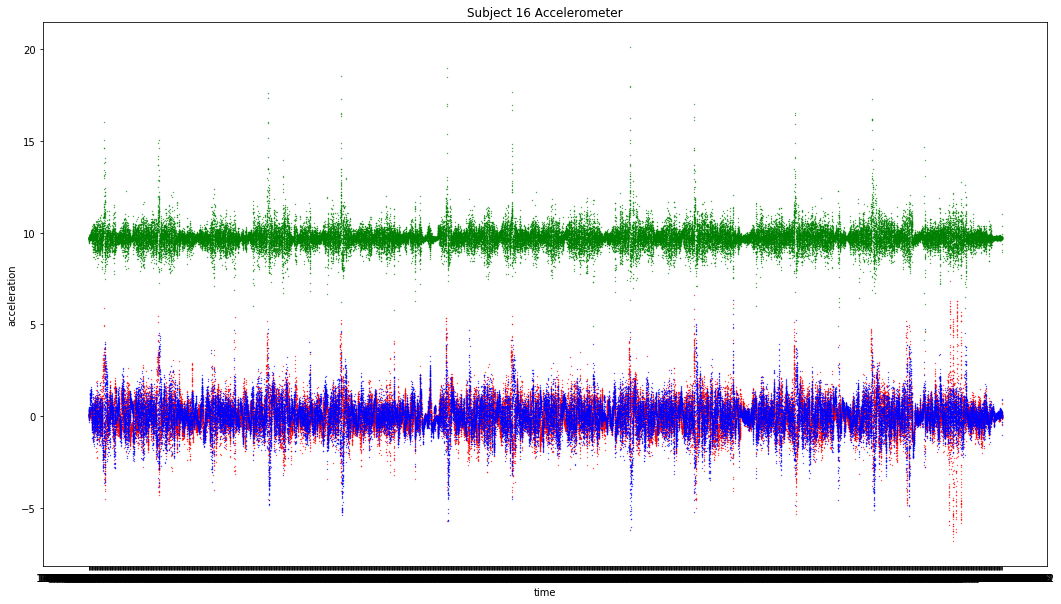

In [15]:
df = accelerometer16
title = "Subject 16 Accelerometer"
ylabel="acceleration"
plot_xyz(df.timestamp,df.x,df.y,df.z,ylabel,title)

In [16]:
gyroscope16 = pd.read_csv('./giroscopio_terra.csv',parse_dates=True)

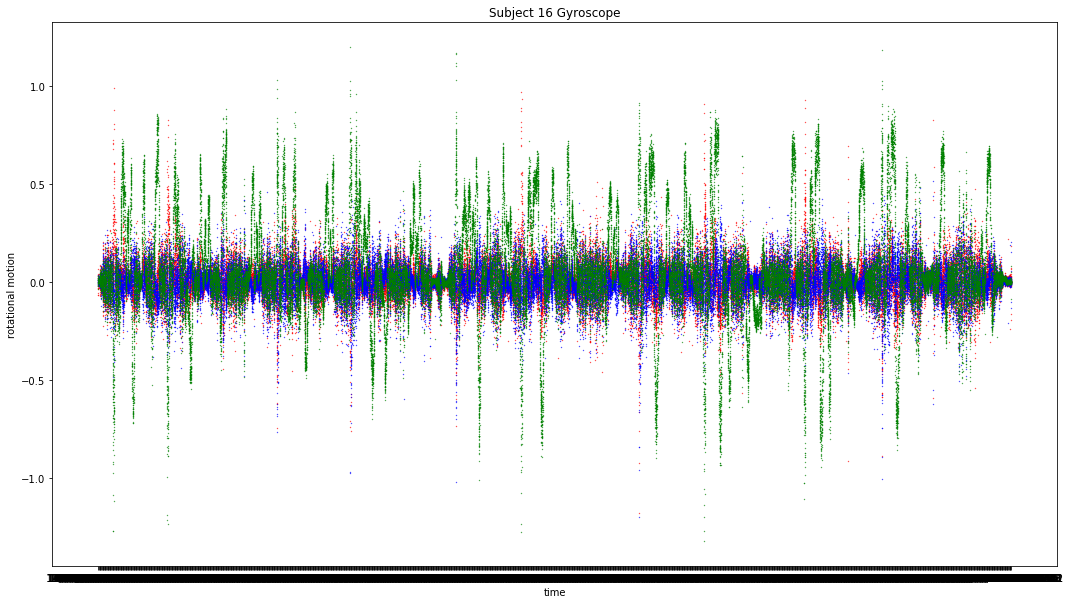

In [17]:
df = gyroscope16
title = "Subject 16 Gyroscope"
ylabel="rotational motion"
plot_xyz(df.timestamp,df.x,df.y,df.z,ylabel,title)

In [18]:
compass16 = pd.read_csv('./campoMagnetico_terra.csv',parse_dates=True)

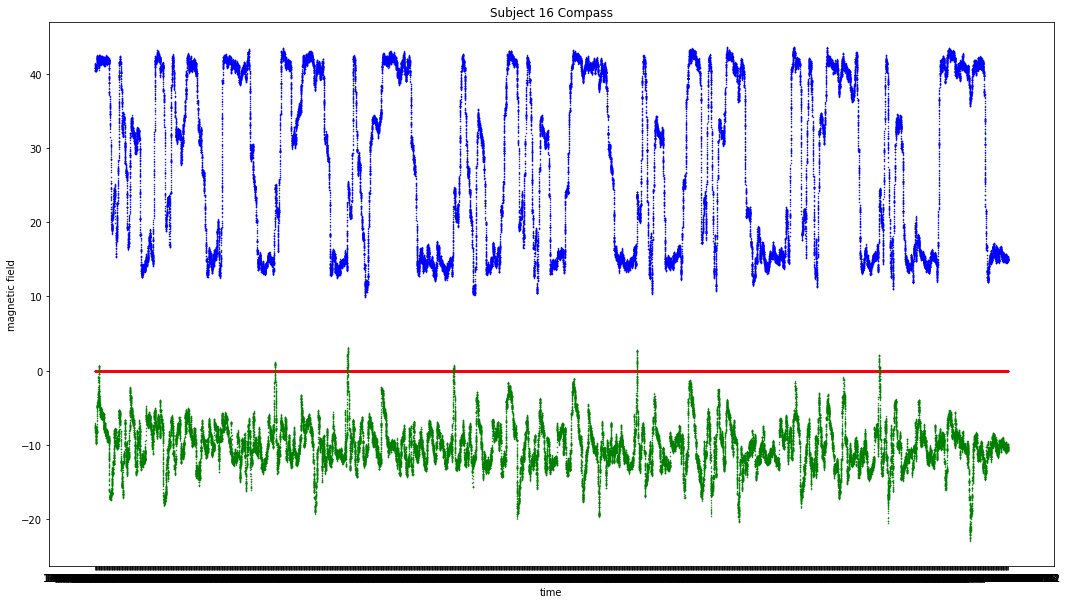

In [19]:
df = compass16
title = "Subject 16 Compass"
ylabel="magnetic field"
plot_xyz(df.timestamp,df.x,df.y,df.z,ylabel,title)

In [22]:
groundtruth16 = pd.read_csv('./groundtruth16.csv')

In [24]:
groundtruth16.head(25)

,evento,beginning,end,event
0,evento_nao_agressivo,2.0,6.5,non aggressive
1,curva_direita_agressiva,19.5,23.5,right turn
2,evento_nao_agressivo,30.0,33.5,non aggressive
3,curva_direita_agressiva,95.0,98.0,right turn
4,curva_esquerda_agressiva,247.0,251.5,left turn
5,curva_esquerda_agressiva,348.7,352.3,left turn
6,evento_nao_agressivo,485.0,489.0,non aggressive
7,curva_esquerda_agressiva,496.0,499.5,left turn
8,curva_direita_agressiva,587.0,590.0,right turn
9,curva_esquerda_agressiva,750.0,753.8,left turn


In [49]:
list(df.event.values)

['right turn',
 'right turn',
 'left turn',
 'left turn',
 'left turn',
 'right turn',
 'left turn',
 'right turn',
 'right turn',
 'left turn',
 'lane change right',
 'lane change right',
 'lane change right']

In [63]:
df.beginning.iloc[0]

19.5

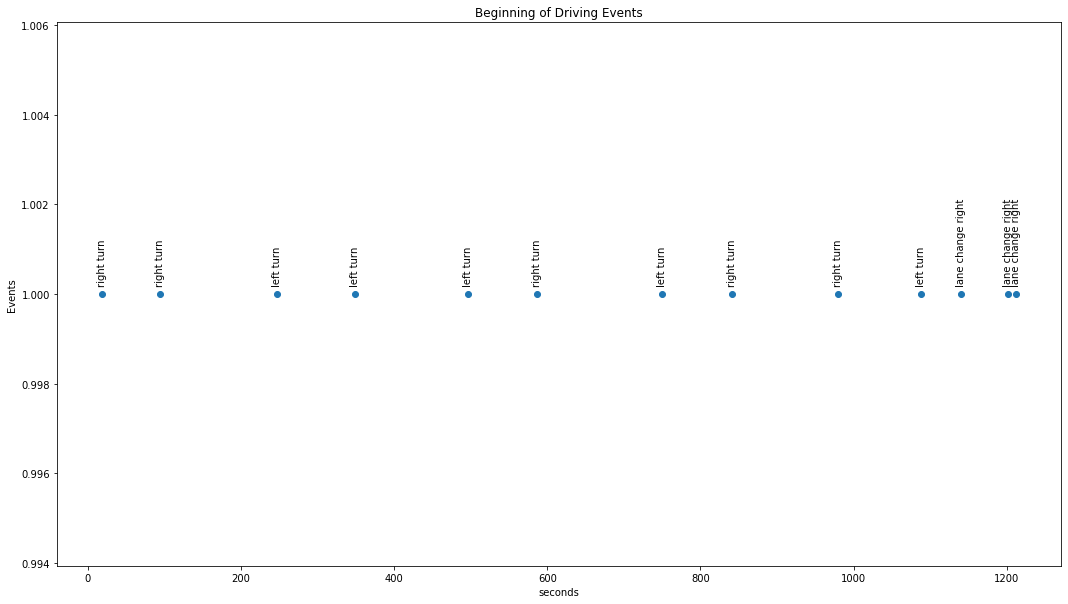

In [65]:
df = groundtruth16
mask = (df.event != 'non aggressive')
df = df[mask]
plt.figure(figsize=(18,10))
x = df.beginning
y = [1 for x in range(df.shape[0])]
labels = list(df.event.values)
plt.scatter(x,y)
#plt.annotate('right turn', (19.5,1),textcoords = "offset points", xytext = (0,10), ha = 'center')
for i, label in enumerate(labels):
    plt.annotate(label,(df.beginning.iloc[i],1),textcoords="offset points", xytext=(0,10),ha = 'center',rotation=90) 
plt.title('Beginning of Driving Events')
plt.xlabel('seconds')
plt.ylabel('Events')
plt.show();